# Summer of Code - Artificial Intelligence

## Week 05: Data Analysis Capstone Project

### Day 01: California Housing Dataset Analysis with Pandas & Seaborn

In this notebook, we will analyze the **California Housing Dataset** using Pandas for data manipulation and Seaborn for visualization.


# California Housing Dataset

The California Housing dataset contains information about housing prices in California districts.

**Dataset Features:**

- `longitude`: Longitude coordinate
- `latitude`: Latitude coordinate
- `housing_median_age`: Median age of houses in the block
- `total_rooms`: Total number of rooms in the block
- `total_bedrooms`: Total number of bedrooms in the block
- `population`: Total population in the block
- `households`: Total number of households in the block
- `median_income`: Median income of households in the block (in tens of thousands)
- `median_house_value`: Median house value (our target variable)
- `ocean_proximity`: Proximity to the ocean (categorical)


# Data Loading and Initial Exploration


In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [ ]:
# Load the California housing dataset
df = pd.read_csv("../../datasets/california_house_prices/housing.csv")

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset loaded successfully!
Dataset shape: (20640, 10)
Memory usage: 2.54 MB


## Data Inspection


In [ ]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Display statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame(
    {
        "Missing Count": missing_values,
        "Missing Percentage": np.round(missing_percentage, 2),
    }
)
missing_df[missing_df["Missing Count"] > 0]

Missing Values:


,Missing Count,Missing Percentage
total_bedrooms,207,1.0


In [39]:
missing_df

,Missing Count,Missing Percentage
longitude,0,0.0
latitude,0,0.0
housing_median_age,0,0.0
total_rooms,0,0.0
total_bedrooms,207,1.0
population,0,0.0
households,0,0.0
median_income,0,0.0
median_house_value,0,0.0
ocean_proximity,0,0.0


## Data Cleaning and Preprocessing


In [ ]:
# Handle missing values in total_bedrooms
print(f"Missing values in total_bedrooms: {df['total_bedrooms'].isnull().sum()}")

# Fill missing values with median (more robust than mean for this type of data)
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

print(f"After filling: {df['total_bedrooms'].isnull().sum()} missing values")
print("Missing values handled successfully!")

Missing values in total_bedrooms: 207
After filling: 0 missing values
Missing values handled successfully!


In [ ]:
# Create derived features for better analysis
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

print("Derived features created:")
print("- rooms_per_household: Average rooms per household")
print("- bedrooms_per_room: Ratio of bedrooms to total rooms")
print("- population_per_household: Average population per household")

Derived features created:
- rooms_per_household: Average rooms per household
- bedrooms_per_room: Ratio of bedrooms to total rooms
- population_per_household: Average population per household


In [42]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


# Exploratory Data Analysis

Now let's explore our data using various seaborn plots.


## Distribution Plots

Let's start by understanding the distribution of our key variables using seaborn's distribution plots.


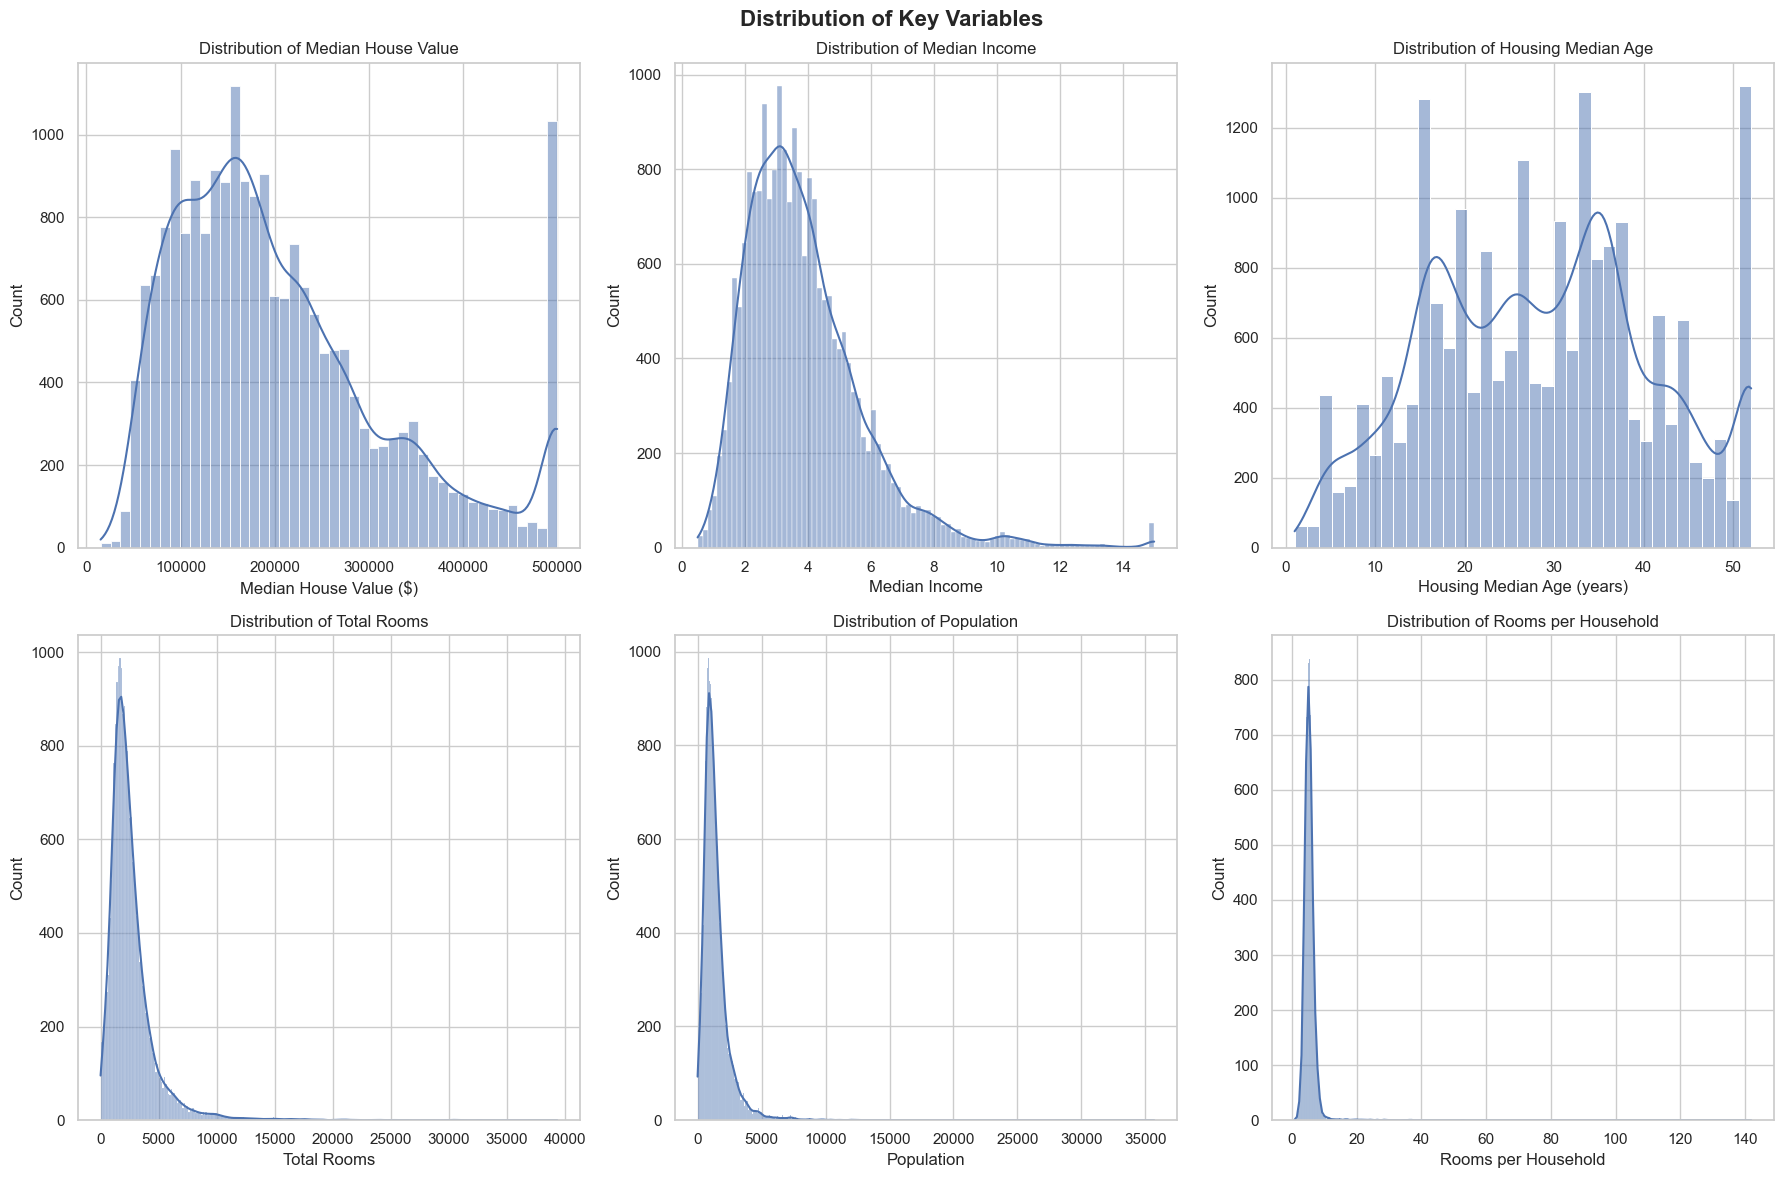

Key Insights from Distribution Plots:
1. Median house value shows a right-skewed distribution with a peak around $200,000
2. Median income is relatively normally distributed
3. Housing age shows a bimodal distribution
4. Total rooms and population are heavily right-skewed


In [ ]:
# Create a figure with multiple subplots for distribution analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Distribution of Key Variables", fontsize=16, fontweight="bold")

# Plot 1: Median house value distribution
sns.histplot(data=df, x="median_house_value", kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Median House Value")
axes[0, 0].set_xlabel("Median House Value ($)")

# Plot 2: Median income distribution
sns.histplot(data=df, x="median_income", kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Median Income")
axes[0, 1].set_xlabel("Median Income")

# Plot 3: Housing median age distribution
sns.histplot(data=df, x="housing_median_age", kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Distribution of Housing Median Age")
axes[0, 2].set_xlabel("Housing Median Age (years)")

# Plot 4: Total rooms distribution
sns.histplot(data=df, x="total_rooms", kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Total Rooms")
axes[1, 0].set_xlabel("Total Rooms")

# Plot 5: Population distribution
sns.histplot(data=df, x="population", kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Population")
axes[1, 1].set_xlabel("Population")

# Plot 6: Rooms per household distribution
sns.histplot(data=df, x="rooms_per_household", kde=True, ax=axes[1, 2])
axes[1, 2].set_title("Distribution of Rooms per Household")
axes[1, 2].set_xlabel("Rooms per Household")

plt.tight_layout()
plt.show()

print("Key Insights from Distribution Plots:")
print(
    "1. Median house value shows a right-skewed distribution with a peak around $200,000"
)
print("2. Median income is relatively normally distributed")
print("3. Housing age shows a bimodal distribution")
print("4. Total rooms and population are heavily right-skewed")

## Categorical Data Analysis

Let's analyze the categorical variable 'ocean_proximity' and its relationship with house prices.


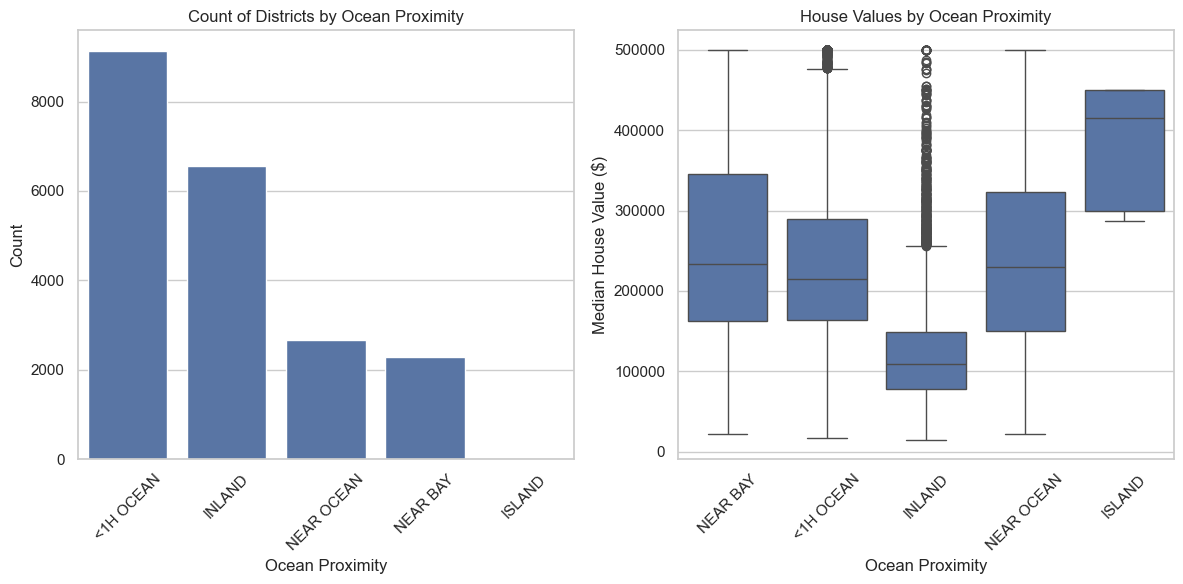

House Value Statistics by Ocean Proximity:


,count,mean,median,std
ocean_proximity,,,,
<1H OCEAN,9136,240084.29,214850.0,106124.29
INLAND,6551,124805.39,108500.0,70007.91
ISLAND,5,380440.00,414700.0,80559.56
NEAR BAY,2290,259212.31,233800.0,122818.54
NEAR OCEAN,2658,249433.98,229450.0,122477.15


In [ ]:
# Count plot for ocean proximity
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(
    data=df, x="ocean_proximity", order=df["ocean_proximity"].value_counts().index
)
plt.title("Count of Districts by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Box plot showing house values by ocean proximity
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="ocean_proximity", y="median_house_value")
plt.title("House Values by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value ($)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Statistical summary by ocean proximity
print("House Value Statistics by Ocean Proximity:")
ocean_stats = (
    df.groupby("ocean_proximity")["median_house_value"]
    .agg(["count", "mean", "median", "std"])
    .round(2)
)
ocean_stats

## Correlation Analysis

Understanding relationships between numerical variables is crucial. Let's use seaborn's heatmap to visualize correlations.


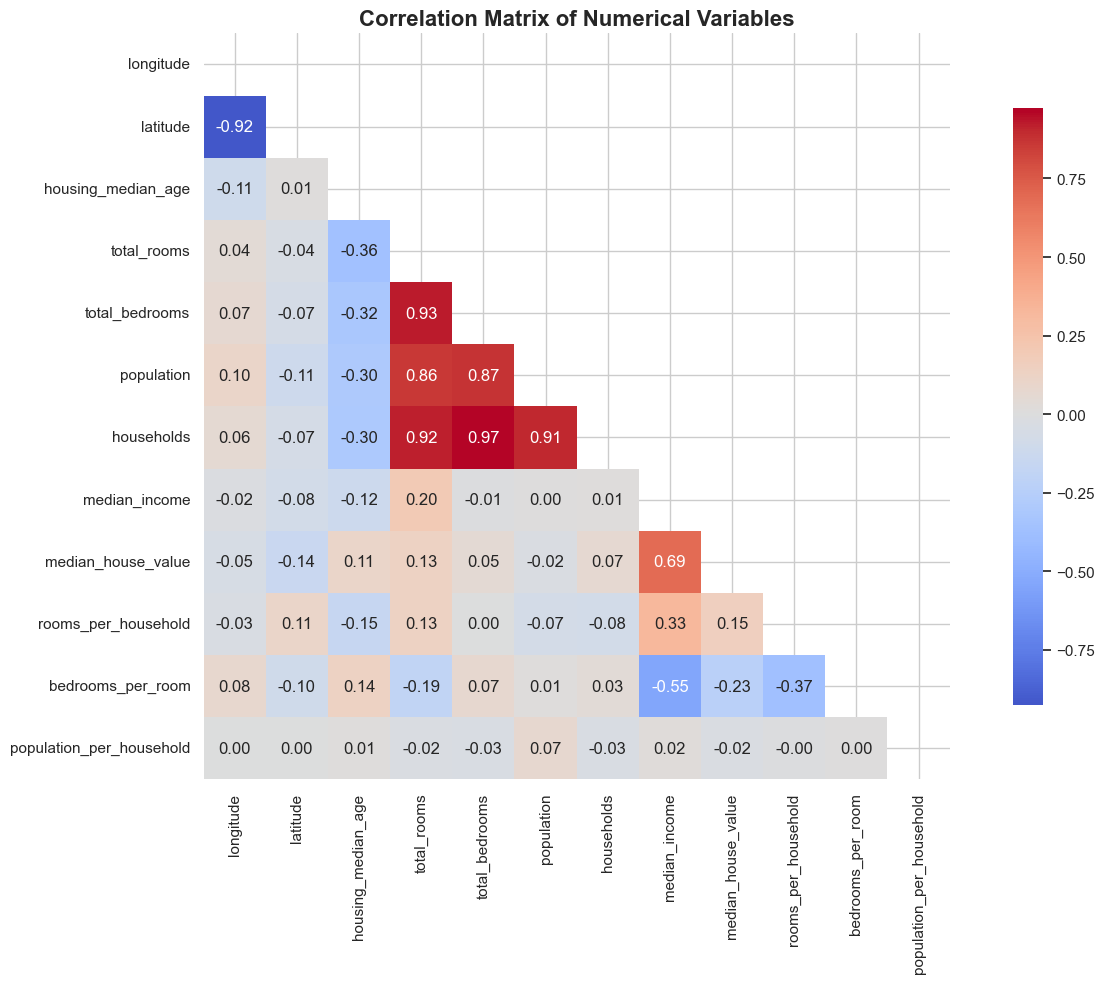

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.8},
)

plt.title("Correlation Matrix of Numerical Variables", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

In [ ]:
# Find strongest correlations with median_house_value
house_value_corr = (
    correlation_matrix["median_house_value"].abs().sort_values(ascending=False)
)
print("\nStrongest correlations with Median House Value:")
house_value_corr


Strongest correlations with Median House Value:


median_house_value          1.000000
median_income               0.688075
bedrooms_per_room           0.233303
rooms_per_household         0.151948
latitude                    0.144160
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
longitude                   0.045967
population                  0.024650
population_per_household    0.023737
Name: median_house_value, dtype: float64

## Scatter Plot Analysis

Let's examine the relationship between the most important variables using scatter plots.


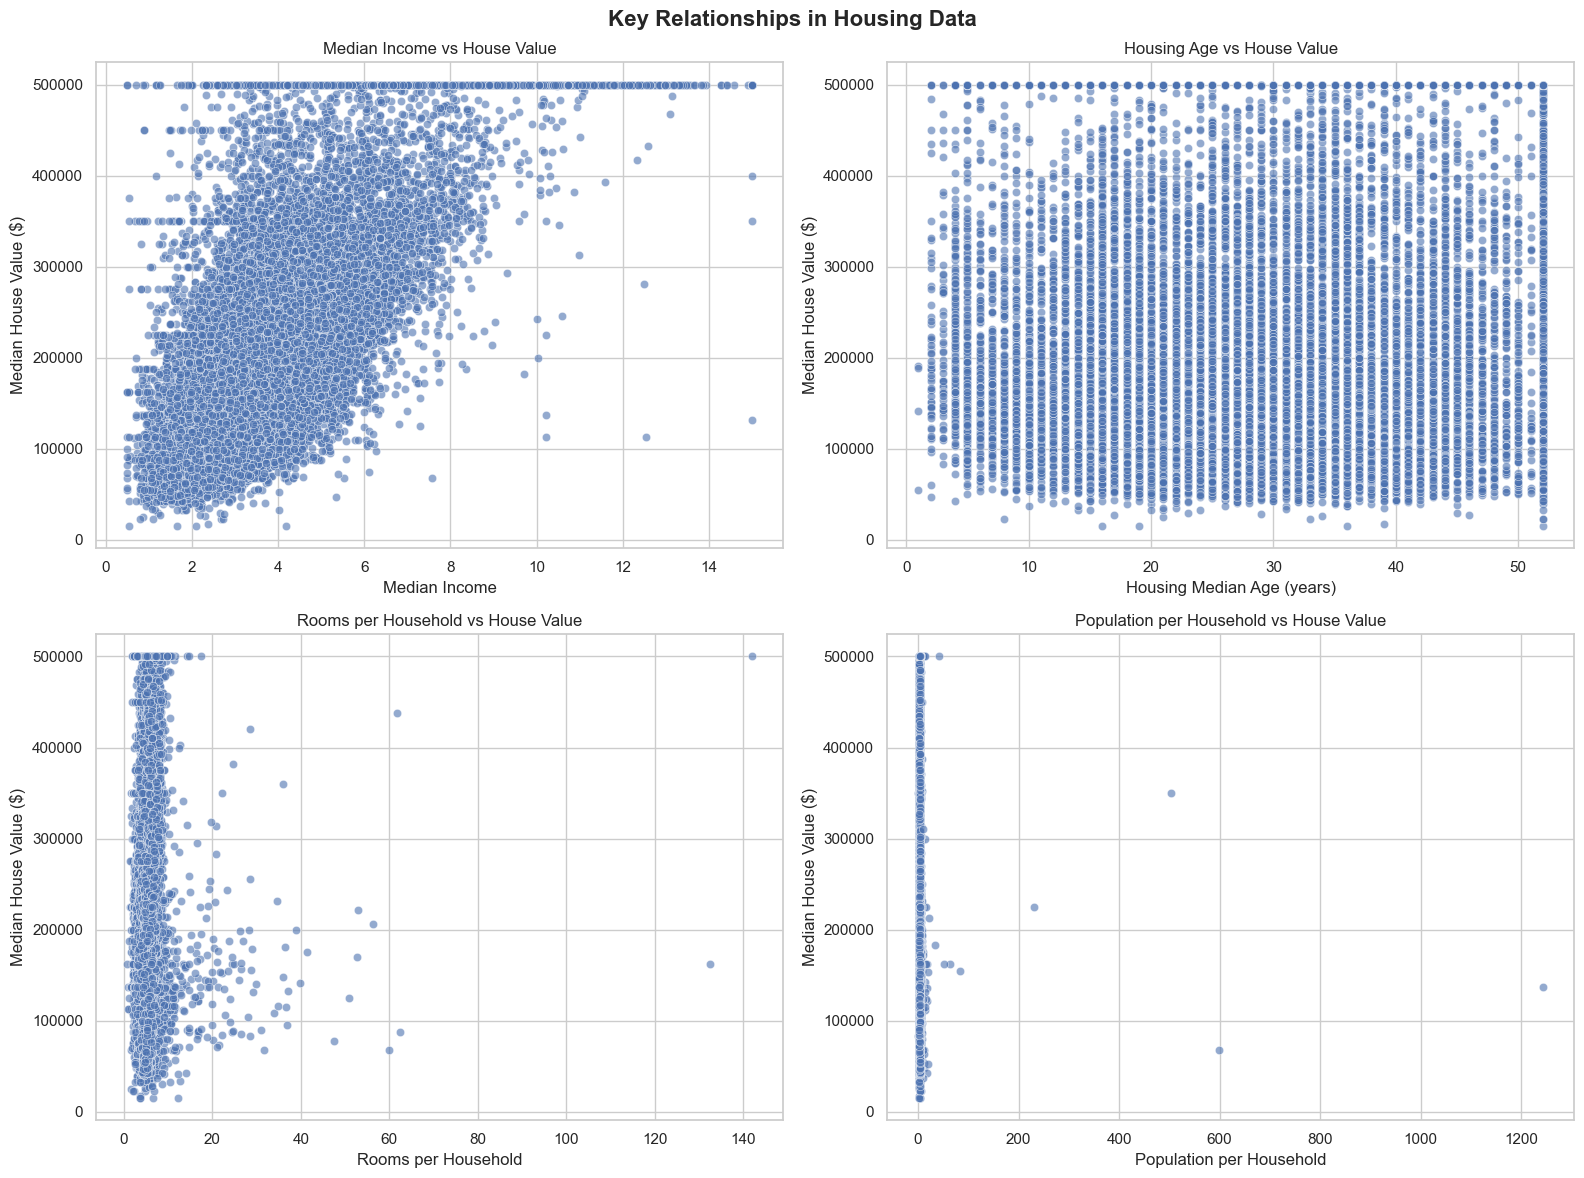

Key Insights from Scatter Plots:
1. Strong positive correlation between median income and house value
2. Housing age shows a weak negative correlation with house value
3. Rooms per household has a moderate positive correlation
4. Population per household shows interesting patterns


In [ ]:
# Create scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Key Relationships in Housing Data", fontsize=16, fontweight="bold")

# Plot 1: Median income vs House value
sns.scatterplot(
    data=df, x="median_income", y="median_house_value", alpha=0.6, ax=axes[0, 0]
)
axes[0, 0].set_title("Median Income vs House Value")
axes[0, 0].set_xlabel("Median Income")
axes[0, 0].set_ylabel("Median House Value ($)")

# Plot 2: Housing age vs House value
sns.scatterplot(
    data=df, x="housing_median_age", y="median_house_value", alpha=0.6, ax=axes[0, 1]
)
axes[0, 1].set_title("Housing Age vs House Value")
axes[0, 1].set_xlabel("Housing Median Age (years)")
axes[0, 1].set_ylabel("Median House Value ($)")

# Plot 3: Rooms per household vs House value
sns.scatterplot(
    data=df, x="rooms_per_household", y="median_house_value", alpha=0.6, ax=axes[1, 0]
)
axes[1, 0].set_title("Rooms per Household vs House Value")
axes[1, 0].set_xlabel("Rooms per Household")
axes[1, 0].set_ylabel("Median House Value ($)")

# Plot 4: Population per household vs House value
sns.scatterplot(
    data=df,
    x="population_per_household",
    y="median_house_value",
    alpha=0.6,
    ax=axes[1, 1],
)
axes[1, 1].set_title("Population per Household vs House Value")
axes[1, 1].set_xlabel("Population per Household")
axes[1, 1].set_ylabel("Median House Value ($)")

plt.tight_layout()
plt.show()

print("Key Insights from Scatter Plots:")
print("1. Strong positive correlation between median income and house value")
print("2. Housing age shows a weak negative correlation with house value")
print("3. Rooms per household has a moderate positive correlation")
print("4. Population per household shows interesting patterns")

# Advanced Seaborn Plots

Let's explore some advanced seaborn visualizations that provide deeper insights.


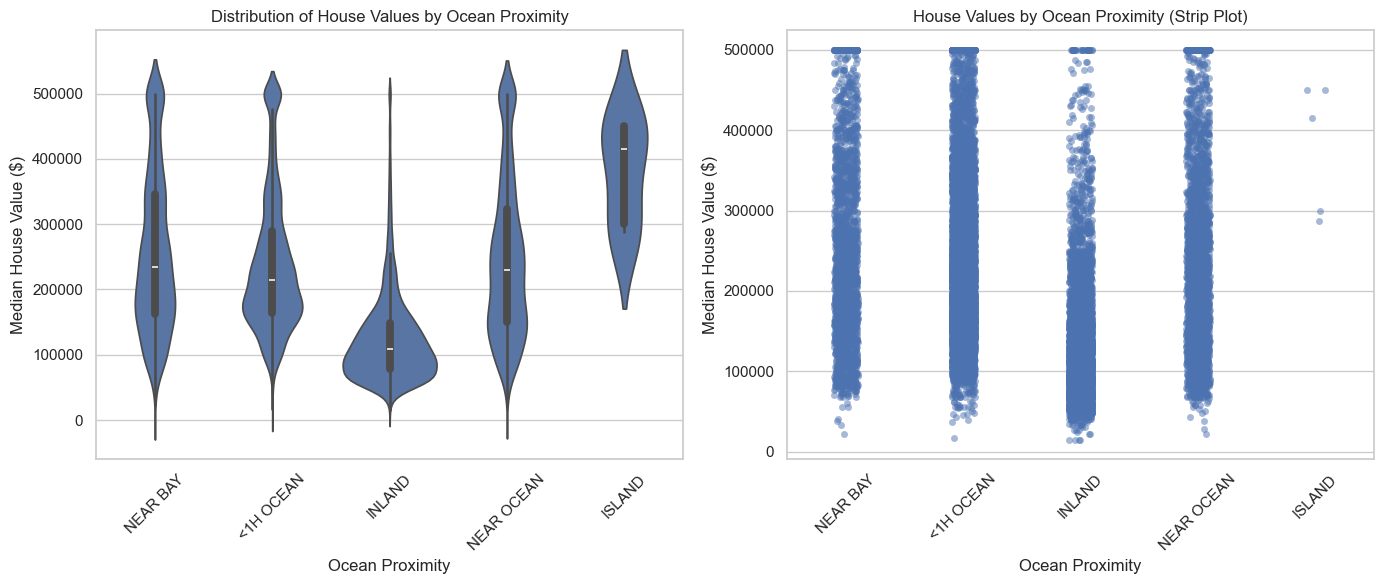

In [60]:
# Violin plot: Distribution of house values by ocean proximity
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=df, x="ocean_proximity", y="median_house_value")
plt.title("Distribution of House Values by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value ($)")
plt.xticks(rotation=45)

# Strip plot with jitter for better visualization
plt.subplot(1, 2, 2)
sns.stripplot(
    data=df, x="ocean_proximity", y="median_house_value", alpha=0.5, jitter=True
)
plt.title("House Values by Ocean Proximity (Strip Plot)")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value ($)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

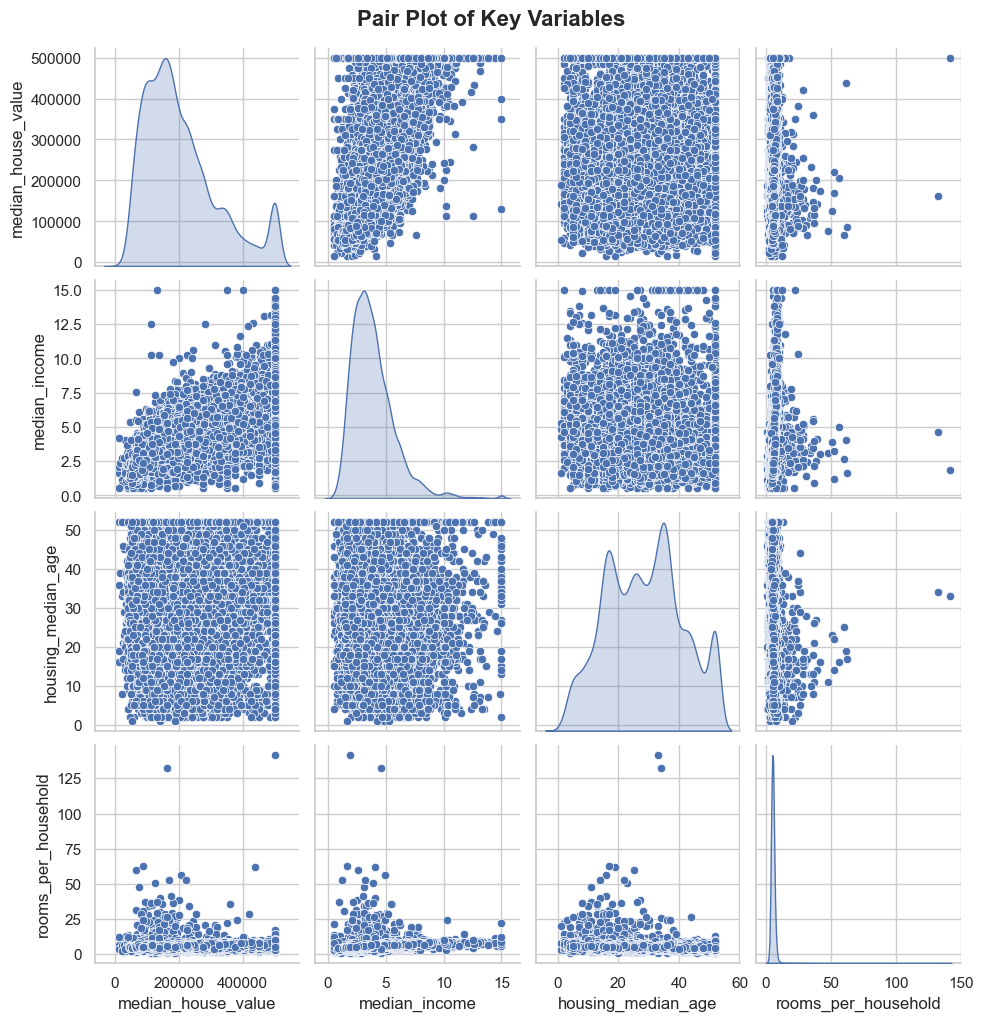

Pair Plot Insights:
1. Diagonal plots show the distribution of each variable
2. Off-diagonal plots show relationships between pairs of variables
3. This helps identify patterns and potential outliers


In [61]:
# Pair plot for key variables
key_vars = [
    "median_house_value",
    "median_income",
    "housing_median_age",
    "rooms_per_household",
]

plt.figure(figsize=(12, 10))
sns.pairplot(df[key_vars], diag_kind="kde")
plt.suptitle("Pair Plot of Key Variables", y=1.02, fontsize=16, fontweight="bold")
plt.show()

print("Pair Plot Insights:")
print("1. Diagonal plots show the distribution of each variable")
print("2. Off-diagonal plots show relationships between pairs of variables")
print("3. This helps identify patterns and potential outliers")

## Geographic Analysis

Since we have longitude and latitude data, let's create a geographic visualization of house prices.


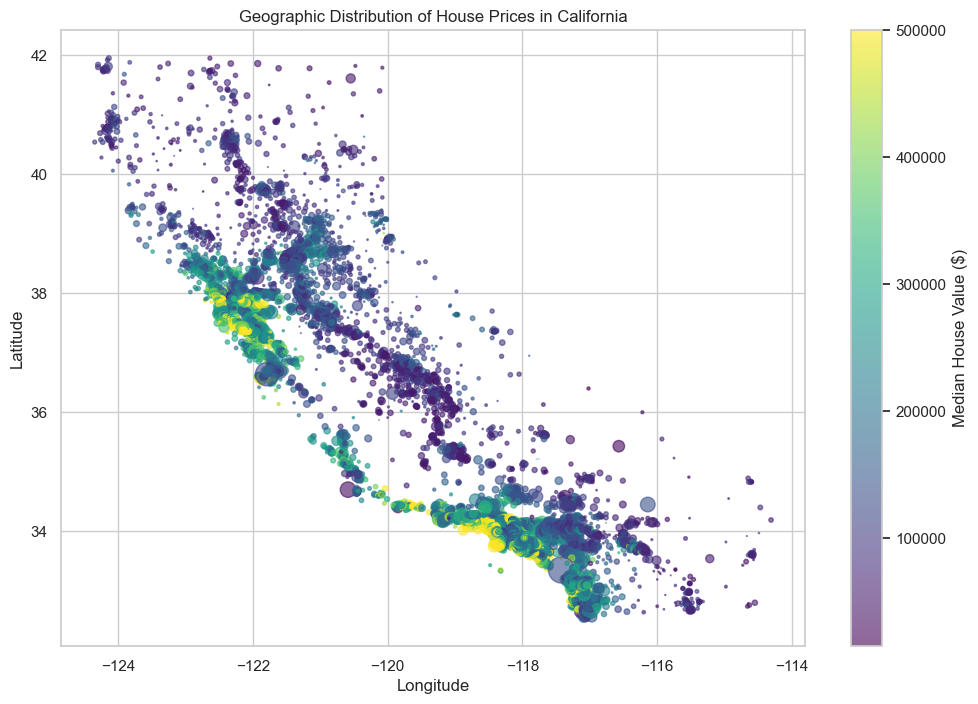

Geographic Insights:
1. Higher house prices are concentrated in coastal areas
2. The San Francisco Bay Area shows the highest prices
3. Inland areas generally have lower house prices


In [62]:
# Create a geographic scatter plot of house prices
plt.figure(figsize=(12, 8))

# Create a scatter plot with color representing house values
scatter = plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["median_house_value"],
    cmap="viridis",
    alpha=0.6,
    s=df["population"] / 100,
)

plt.colorbar(scatter, label="Median House Value ($)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of House Prices in California")
plt.show()

print("Geographic Insights:")
print("1. Higher house prices are concentrated in coastal areas")
print("2. The San Francisco Bay Area shows the highest prices")
print("3. Inland areas generally have lower house prices")

# 5. Statistical Analysis and Insights

Let's perform some statistical analysis to extract meaningful insights from our data.


In [63]:
# Statistical analysis by ocean proximity
print("=== STATISTICAL ANALYSIS BY OCEAN PROXIMITY ===\n")

for proximity in df["ocean_proximity"].unique():
    subset = df[df["ocean_proximity"] == proximity]
    print(f"{proximity}:")
    print(f"  Count: {len(subset):,}")
    print(f"  Mean House Value: ${subset['median_house_value'].mean():,.0f}")
    print(f"  Median House Value: ${subset['median_house_value'].median():,.0f}")
    print(f"  Mean Income: {subset['median_income'].mean():.2f}")
    print(f"  Mean Housing Age: {subset['housing_median_age'].mean():.1f} years")
    print()

=== STATISTICAL ANALYSIS BY OCEAN PROXIMITY ===

NEAR BAY:
  Count: 2,290
  Mean House Value: $259,212
  Median House Value: $233,800
  Mean Income: 4.17
  Mean Housing Age: 37.7 years

<1H OCEAN:
  Count: 9,136
  Mean House Value: $240,084
  Median House Value: $214,850
  Mean Income: 4.23
  Mean Housing Age: 29.3 years

INLAND:
  Count: 6,551
  Mean House Value: $124,805
  Median House Value: $108,500
  Mean Income: 3.21
  Mean Housing Age: 24.3 years

NEAR OCEAN:
  Count: 2,658
  Mean House Value: $249,434
  Median House Value: $229,450
  Mean Income: 4.01
  Mean Housing Age: 29.3 years

ISLAND:
  Count: 5
  Mean House Value: $380,440
  Median House Value: $414,700
  Mean Income: 2.74
  Mean Housing Age: 42.4 years



In [64]:
# Income brackets analysis
df["income_bracket"] = pd.cut(
    df["median_income"],
    bins=[0, 2, 4, 6, 8, 10, 15],
    labels=["Very Low", "Low", "Medium", "High", "Very High", "Extremely High"],
)

income_analysis = (
    df.groupby("income_bracket")
    .agg(
        {
            "median_house_value": ["count", "mean", "median"],
            "housing_median_age": "mean",
            "rooms_per_household": "mean",
        }
    )
    .round(2)
)

print("=== INCOME BRACKET ANALYSIS ===\n")
income_analysis

=== INCOME BRACKET ANALYSIS ===



median_house_value                      housing_median_age  \
                            count       mean    median               mean   
income_bracket                                                              
Very Low                     2457  112497.16   93300.0              31.84   
Low                         10096  168199.35  153100.0              29.48   
Medium                       5725  244635.20  226800.0              27.04   
High                         1672  344844.69  335900.0              24.63   
Very High                     382  443244.98  477900.0              26.57   
Extremely High                259  481236.34  500001.0              27.59   

               rooms_per_household  
                              mean  
income_bracket                      
Very Low                      4.46  
Low                           5.00  
Medium                        5.90  
High                          6.84  
Very High                     7.40  
Extremely High                8.03

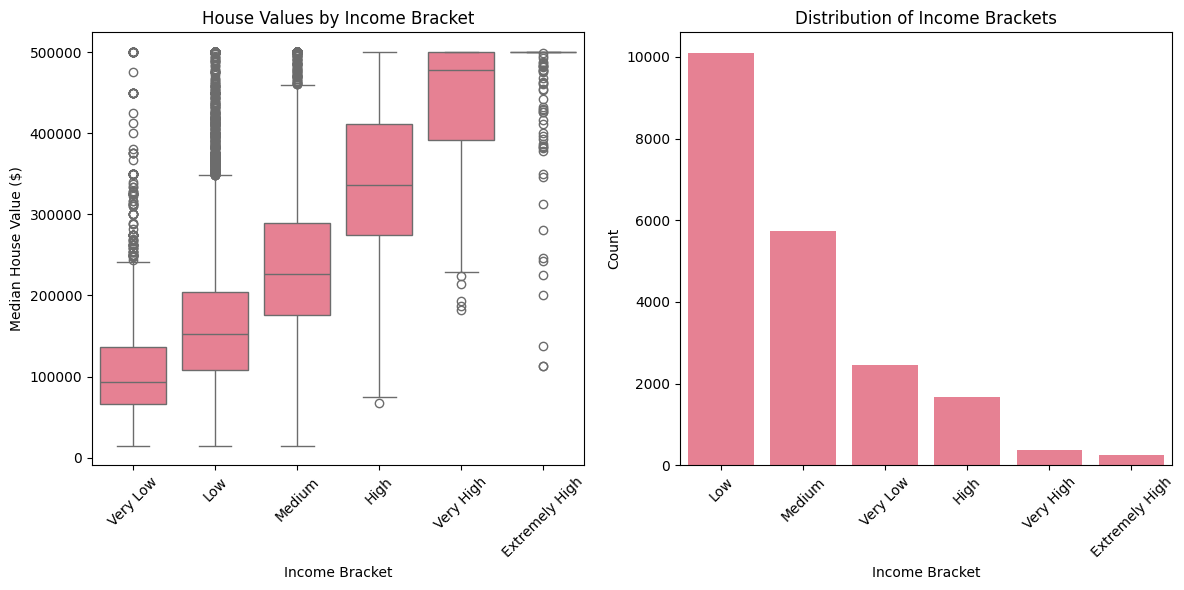

In [ ]:
# Visualize income brackets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="income_bracket", y="median_house_value")
plt.title("House Values by Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Median House Value ($)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(
    data=df, x="income_bracket", order=df["income_bracket"].value_counts().index
)
plt.title("Distribution of Income Brackets")
plt.xlabel("Income Bracket")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 6. Key Findings and Business Insights

Based on our comprehensive analysis, let's summarize the key findings:


In [65]:
print("=== KEY FINDINGS FROM CALIFORNIA HOUSING ANALYSIS ===\n")

print("1. GEOGRAPHIC INSIGHTS:")
print(f"   - Total districts analyzed: {len(df):,}")
print(f"   - Highest house value: ${df['median_house_value'].max():,.0f}")
print(f"   - Lowest house value: ${df['median_house_value'].min():,.0f}")
print(f"   - Average house value: ${df['median_house_value'].mean():,.0f}")
print()

print("2. OCEAN PROXIMITY IMPACT:")
ocean_impact = (
    df.groupby("ocean_proximity")["median_house_value"]
    .mean()
    .sort_values(ascending=False)
)
for proximity, value in ocean_impact.items():
    print(f"   - {proximity}: ${value:,.0f} average house value")
print()

print("3. INCOME CORRELATION:")
income_corr = correlation_matrix.loc["median_income", "median_house_value"]
print(f"   - Correlation between income and house value: {income_corr:.3f}")
print(
    f"   - This is a {'strong' if abs(income_corr) > 0.7 else 'moderate' if abs(income_corr) > 0.3 else 'weak'} correlation"
)
print()

print("4. HOUSING CHARACTERISTICS:")
print(f"   - Average housing age: {df['housing_median_age'].mean():.1f} years")
print(f"   - Average rooms per household: {df['rooms_per_household'].mean():.1f}")
print(f"   - Average bedrooms per room: {df['bedrooms_per_room'].mean():.3f}")
print()

print("5. BUSINESS RECOMMENDATIONS:")
print("   - Focus on coastal areas for premium pricing")
print("   - Income is the strongest predictor of house value")
print("   - Consider housing age as a factor in pricing")
print("   - Room-to-household ratio affects property values")

=== KEY FINDINGS FROM CALIFORNIA HOUSING ANALYSIS ===

1. GEOGRAPHIC INSIGHTS:
   - Total districts analyzed: 20,640
   - Highest house value: $500,001
   - Lowest house value: $14,999
   - Average house value: $206,856

2. OCEAN PROXIMITY IMPACT:
   - ISLAND: $380,440 average house value
   - NEAR BAY: $259,212 average house value
   - NEAR OCEAN: $249,434 average house value
   - <1H OCEAN: $240,084 average house value
   - INLAND: $124,805 average house value

3. INCOME CORRELATION:
   - Correlation between income and house value: 0.688
   - This is a moderate correlation

4. HOUSING CHARACTERISTICS:
   - Average housing age: 28.6 years
   - Average rooms per household: 5.4
   - Average bedrooms per room: 0.214

5. BUSINESS RECOMMENDATIONS:
   - Focus on coastal areas for premium pricing
   - Income is the strongest predictor of house value
   - Consider housing age as a factor in pricing
   - Room-to-household ratio affects property values
